# Momentum

A stock that's going up tends to keep going up...until it doesn't.  Momentum is the theory that stocks that have recently gone up will keep going up disproportionate to their underlying value because folks are overenthusiastic about them.

    On the first trading day of each week
    1. The SPY is higher than 'lookback' months ago, buy
    2. If the SPY is lower than 'lookback' months ago, sell your long position.
    
    The 'lookback' time period can be random, meaning a random lookback period is used for each new position.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
#symbol = 'OIH'

capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()

In [4]:
options = {
    'use_adj' : True,
    'use_cache' : True,
    'lookback': None,
    'margin': 1
}

Run Strategy

In [5]:
s = strategy.Strategy(symbol, capital, start, end, options)
s.run()

View logs

In [6]:
s.tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
24,2016-05-23,176.87,2016-06-27,172.93,-3.94,-1631.44,414,61610.61,LONG,SPY
25,2016-07-05,180.57,2018-12-17,231.00,50.44,19972.74,396,81583.35,LONG,SPY
26,2019-02-11,246.24,2019-05-28,256.03,9.79,3633.63,371,85216.97,LONG,SPY
27,2019-06-10,264.09,2020-03-09,254.25,-9.85,-3544.23,360,81672.75,LONG,SPY
28,2020-05-26,278.91,2022-02-22,411.11,132.20,43360.09,328,125032.84,LONG,SPY
29,2022-02-28,417.87,2022-03-07,401.41,-16.46,-5316.87,323,119715.97,LONG,SPY
30,2022-03-14,399.08,2022-05-09,382.24,-16.84,-5472.03,325,114243.94,LONG,SPY
31,2023-01-03,370.37,2023-01-09,377.21,6.85,2293.67,335,116537.61,LONG,SPY
32,2023-04-03,401.20,2023-05-08,402.94,1.75,550.46,315,117088.07,LONG,SPY
33,2023-05-22,408.85,2024-12-27,595.01,186.16,57709.53,310,174797.60,LONG,SPY


In [7]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2024-12-20,183601.01,183601.01,183601.01,310,344.50,1.00,-
2024-12-23,184698.40,184698.40,184698.40,310,344.50,1.00,-
2024-12-24,186747.50,186747.50,186747.50,310,344.50,1.00,-
2024-12-26,186759.91,186759.91,186759.91,310,344.50,1.00,-
2024-12-27,184797.60,184797.60,184797.60,0,184797.60,1.00,X


Generate strategy stats - display all available stats

In [8]:
pf.print_full(s.stats)

start                                                   1994-07-05
end                                                     2024-12-27
beginning_balance                                            10000
ending_balance                                           184797.60
total_net_profit                                         174797.60
gross_profit                                             208807.41
gross_loss                                               -34009.81
profit_factor                                                 6.14
return_on_initial_capital                                  1747.98
annual_return_rate                                           10.04
trading_period                           30 years 5 months 22 days
pct_time_in_market                                           80.41
margin                                                           1
avg_leverage                                                  1.00
max_leverage                                                  

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [9]:
benchmark = pf.Benchmark(symbol, s.capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

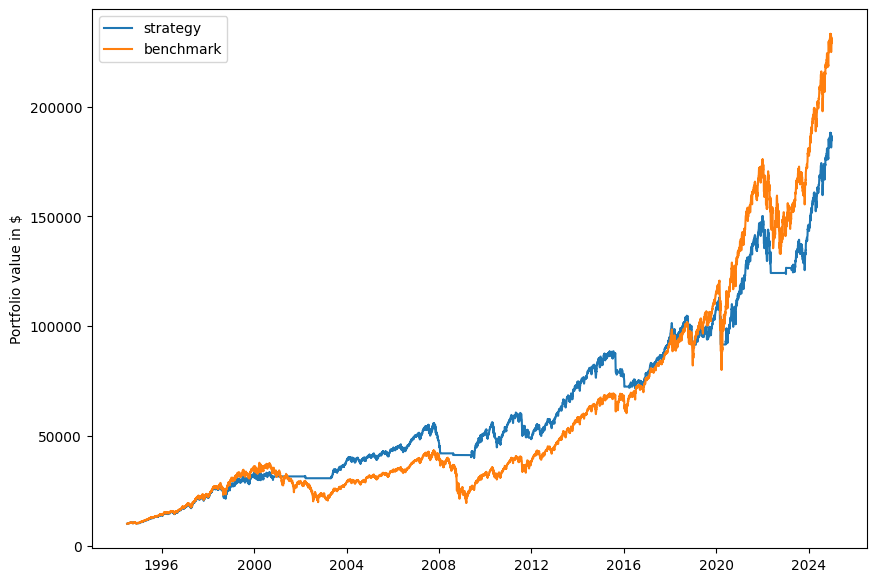

In [10]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Plot Trades

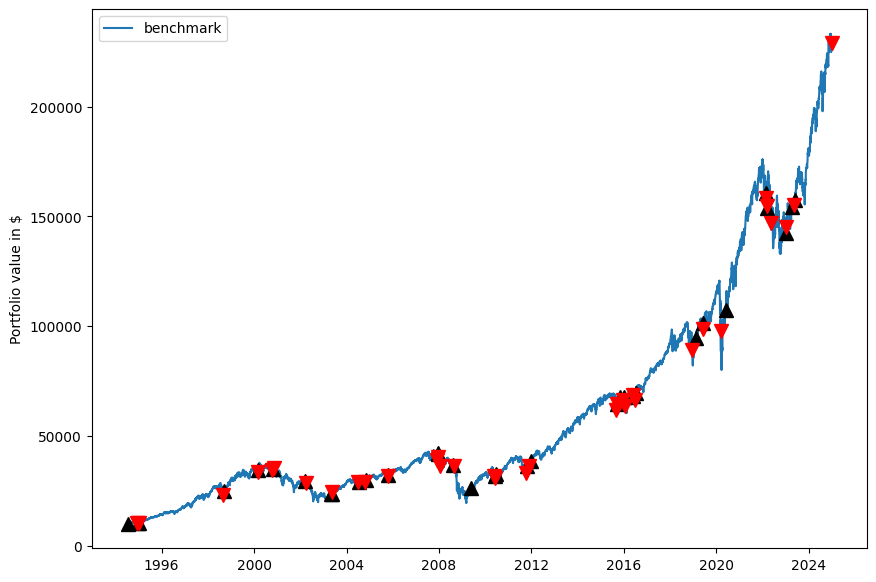

In [11]:
pf.plot_trades(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,10.04,10.82
max_closed_out_drawdown,-28.30,-55.18
annualized_return_over_max_drawdown,0.35,0.20
best_month,17.77,23.61
worst_month,-18.92,-30.98
sharpe_ratio,0.78,0.64
sortino_ratio,0.88,0.82
monthly_std,3.48,4.52
annual_std,14.43,17.36


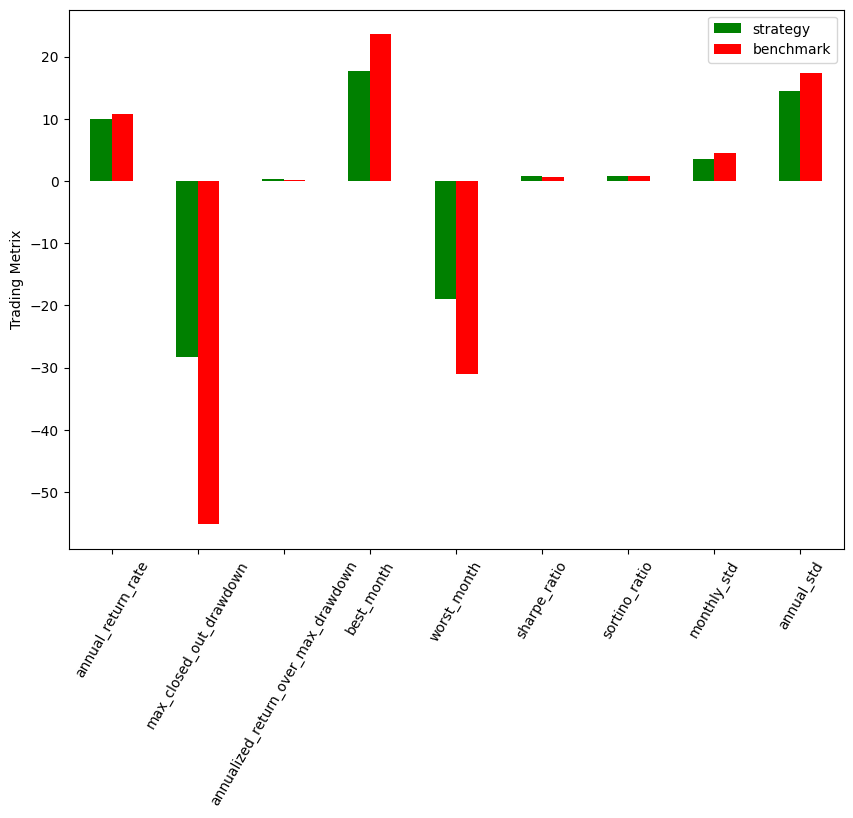

In [12]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df